In [34]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

# Read Data

In [6]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
#Shape

df.shape

(1460, 81)

# Data Cleanup

In [8]:
#Removing ID and columns with only duplicate values and duplicate rows

df.drop(['Id'], axis=1, inplace=True)
df = df.drop_duplicates()
uniques = df.apply(lambda x:x.nunique())
df = df.drop(uniques[uniques < 2].index, axis = 1)
print(df.shape)


(1460, 80)


In [9]:
#null Values 

print(((df.isnull().sum()/df.shape[0])*100).round(2))


MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [10]:
# Dropping Columns with more than 15 % missing values
df.drop(['LotFrontage', 'MiscFeature','Alley', 'Fence', 'PoolQC', 'FireplaceQu' ], axis=1, inplace=True)
print(((df.isnull().sum()/df.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [11]:
#dropping #NA rows

df.dropna(axis='rows', inplace=True)

In [12]:
print(((df.isnull().sum()/df.shape[0])*100).round(2))

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

In [13]:
print(df.shape)

(1338, 74)


In [14]:
# Checking the number of numerical features and the number of categorical features
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
num_col = []
cat_col = []
for i in df.columns:
    if is_numeric_dtype(df[i]):
        num_col.append(i)
    else:
        cat_col.append(i)
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 36 numerical features in the dataset
There are 38 categorical features in the dataset


In [15]:
print(num_col)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [16]:
print(cat_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


# Visualising numerical predictor variables with Target Variable- Sales Price

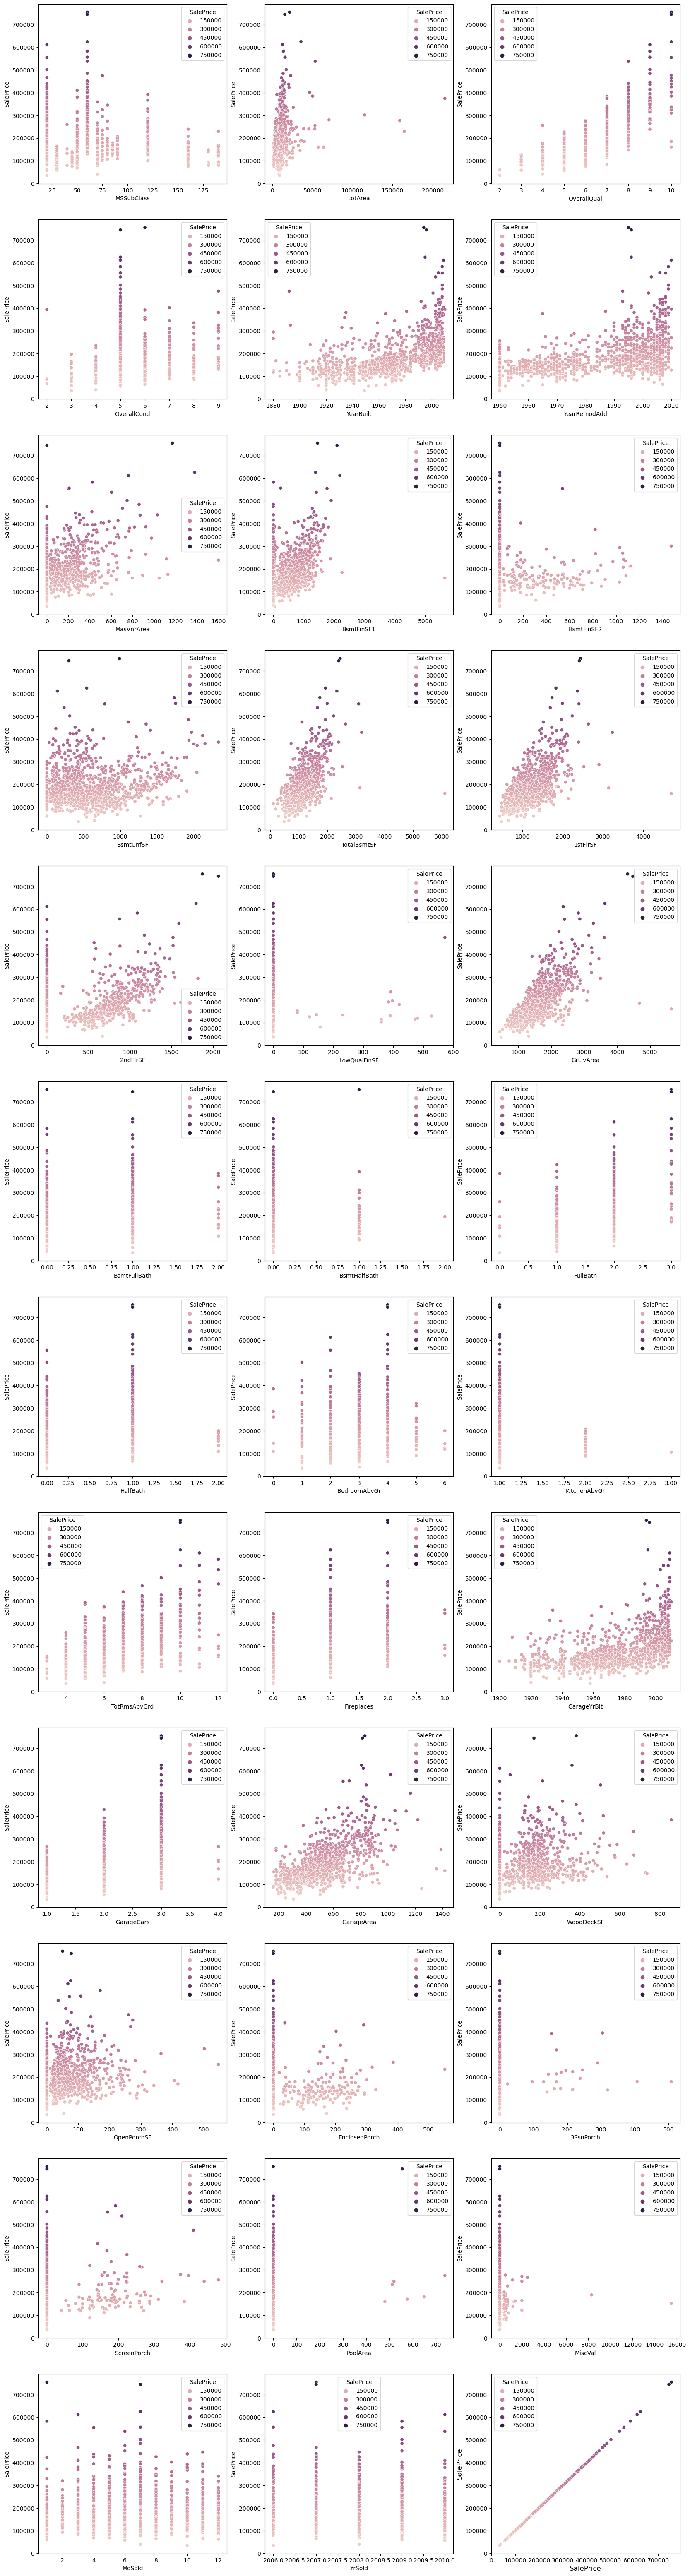

In [17]:
#Visualising numerical predictor variables with Target Variables

df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    




# Visualising categorical predictor variables with Target Variables

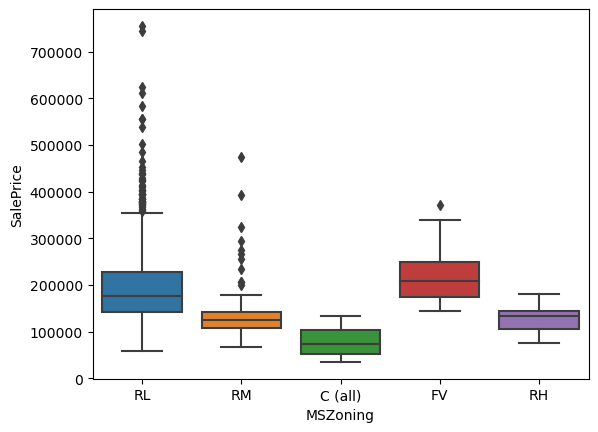

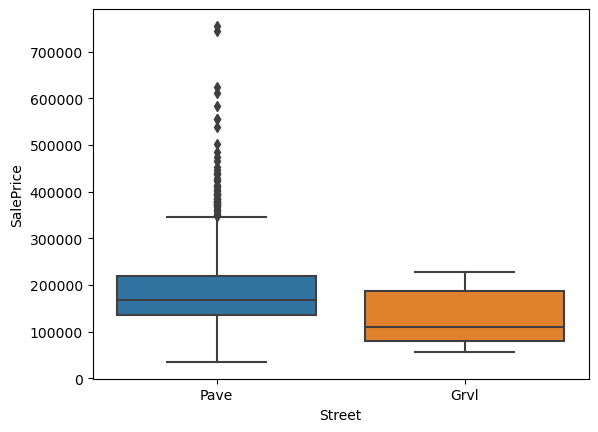

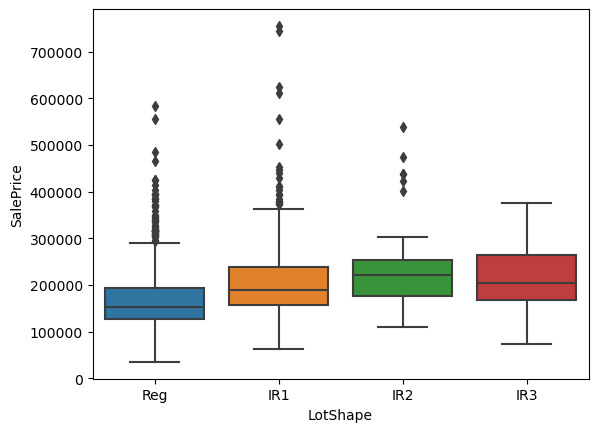

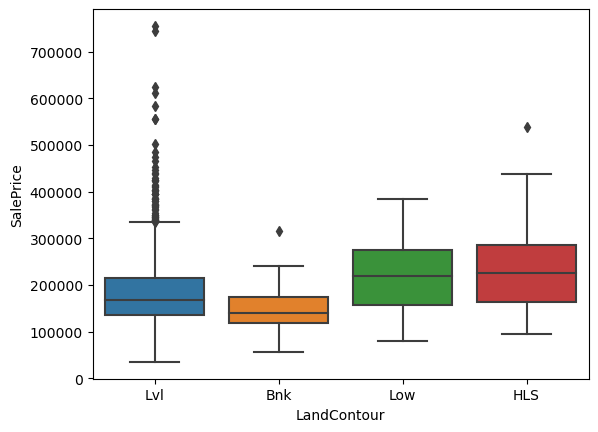

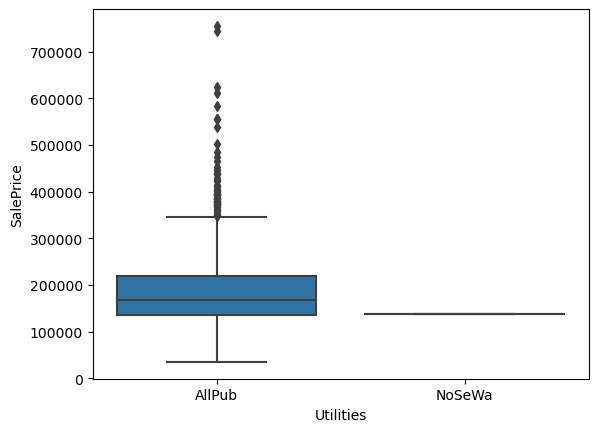

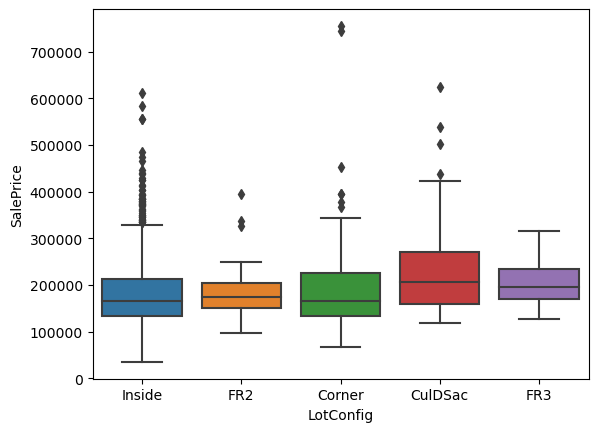

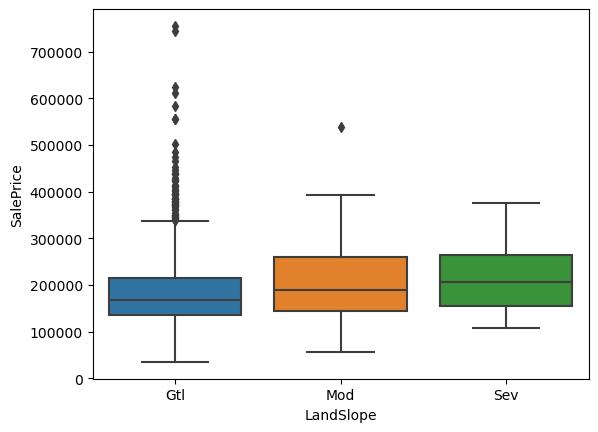

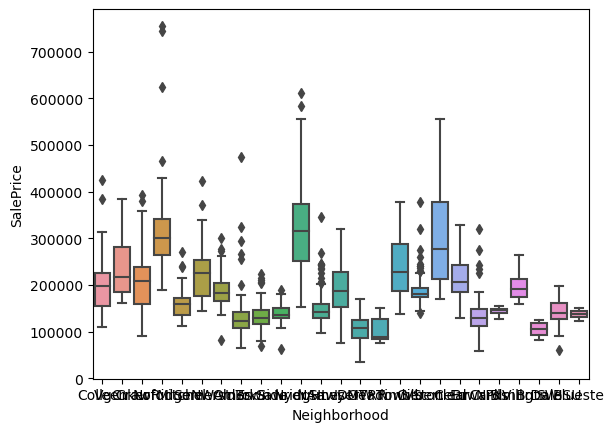

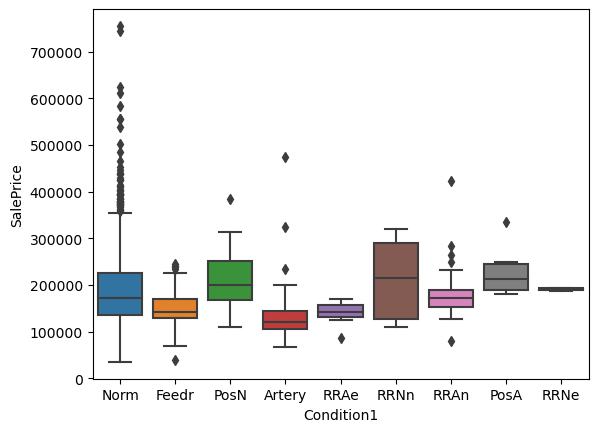

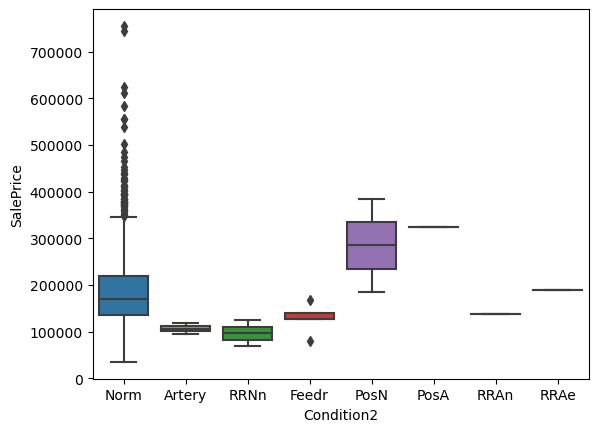

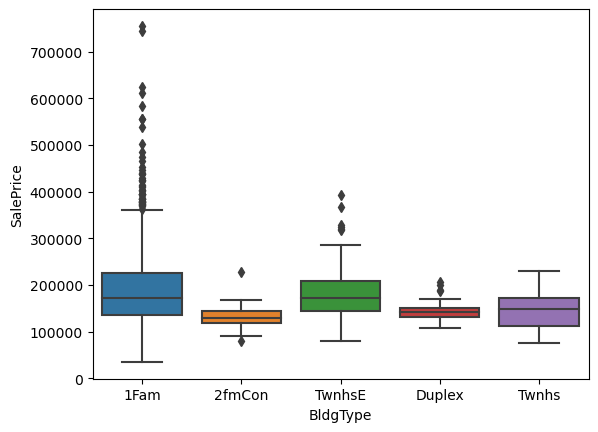

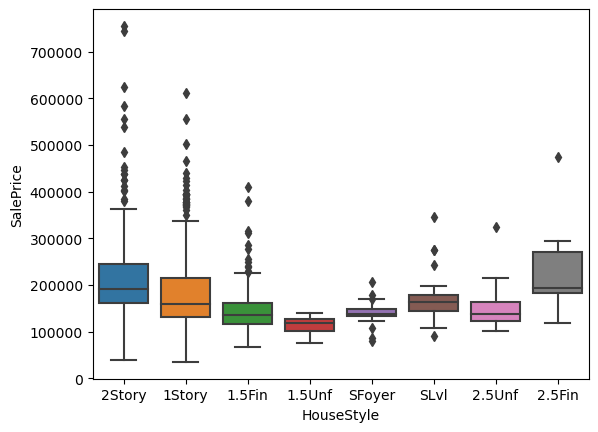

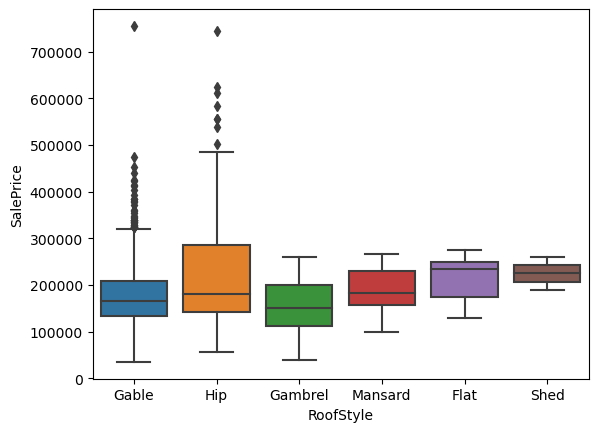

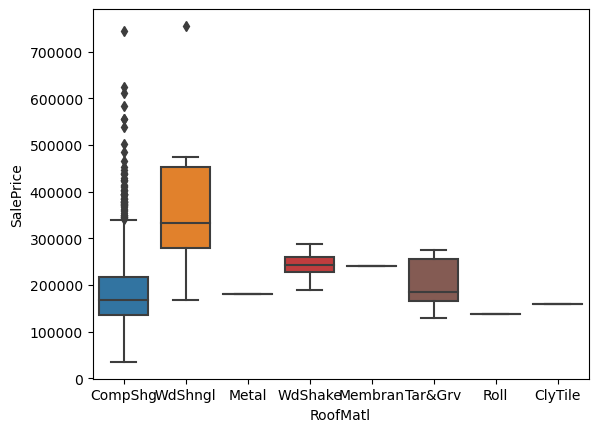

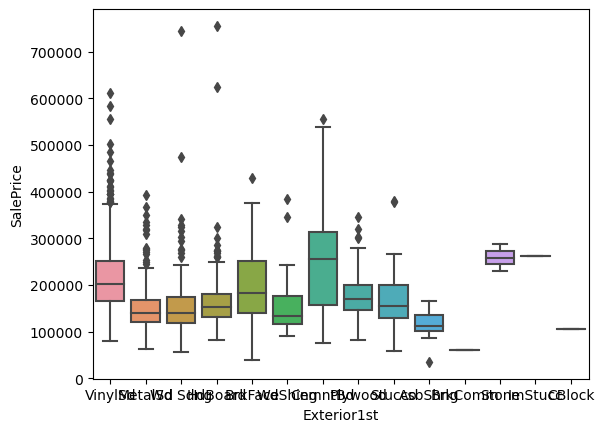

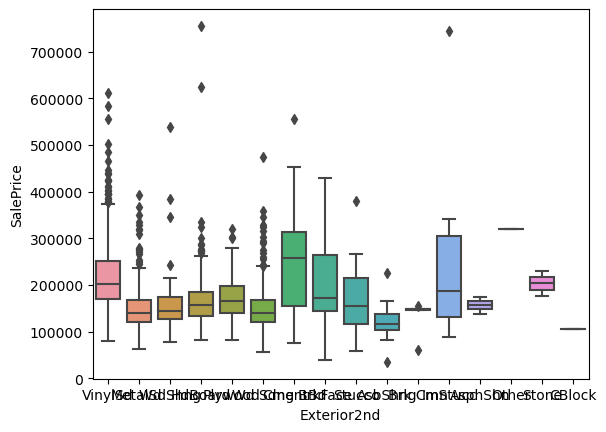

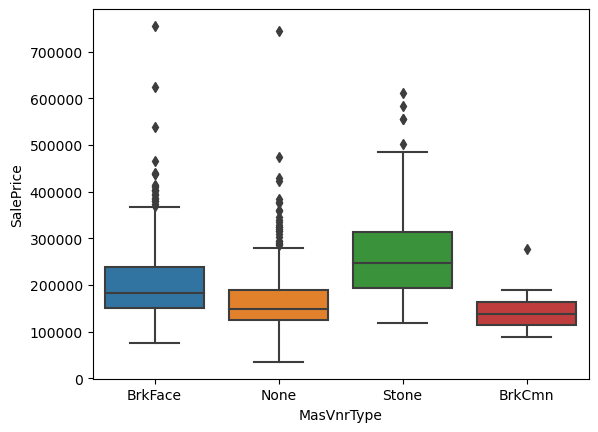

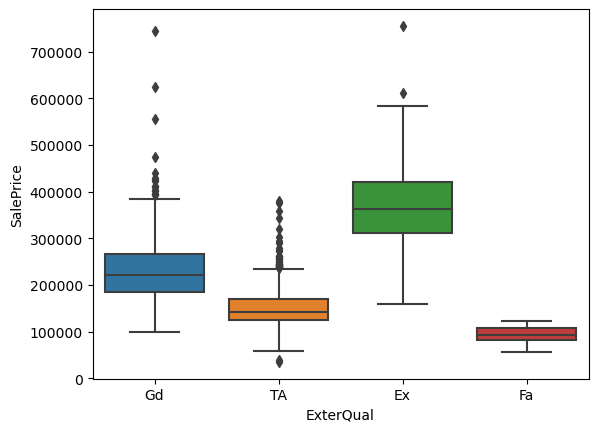

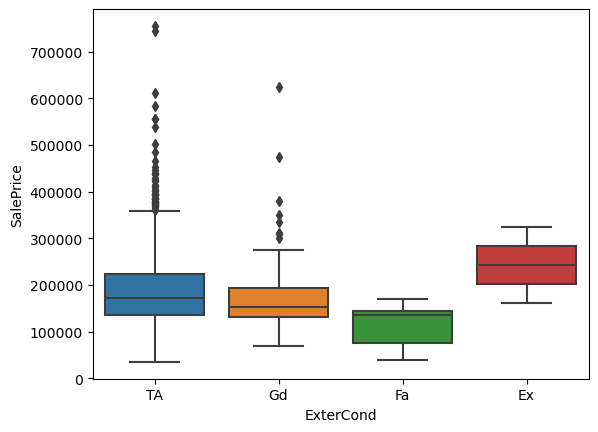

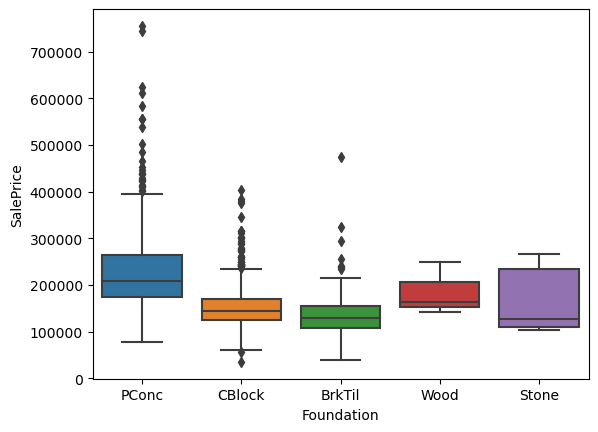

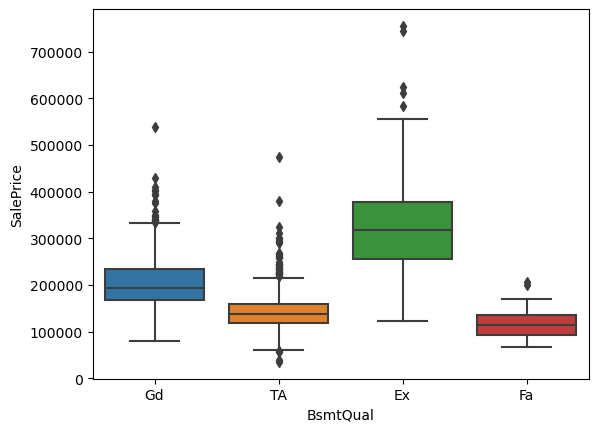

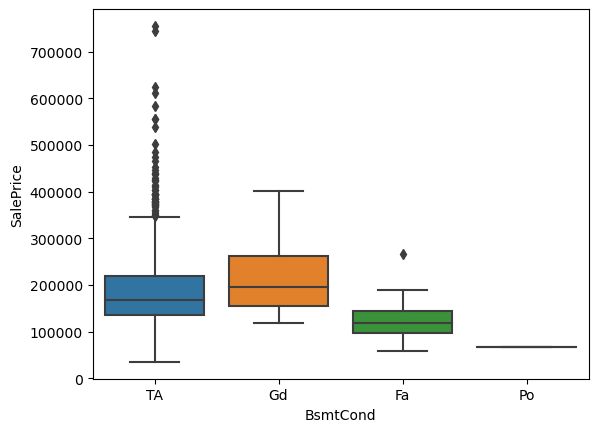

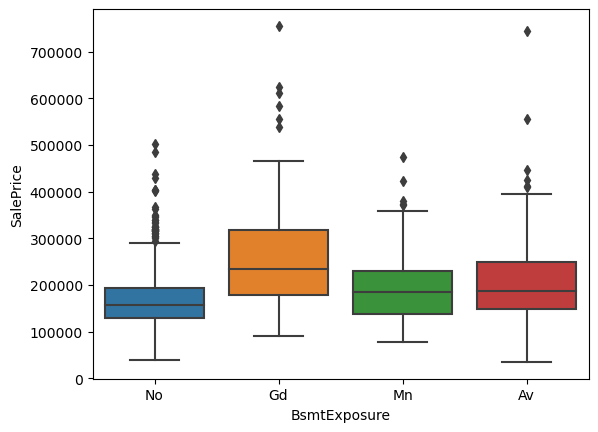

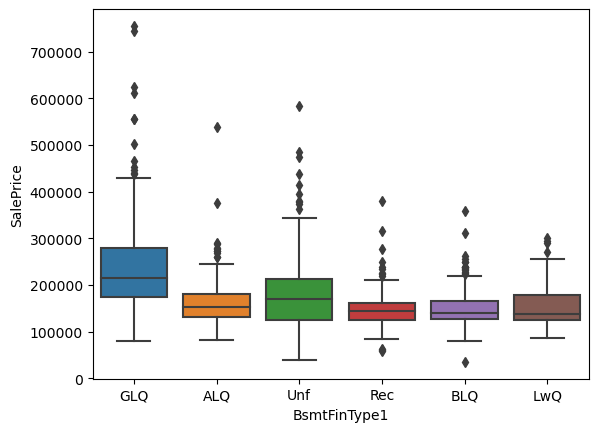

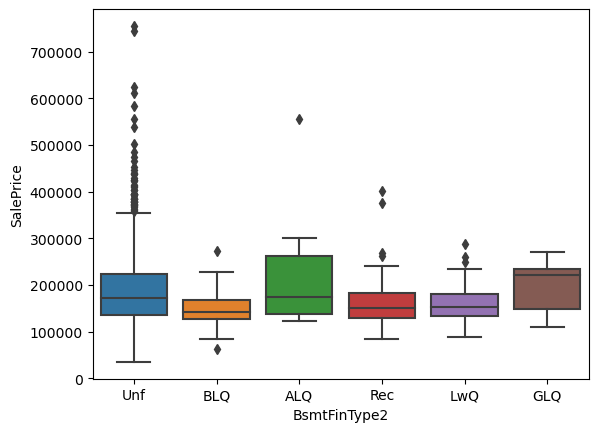

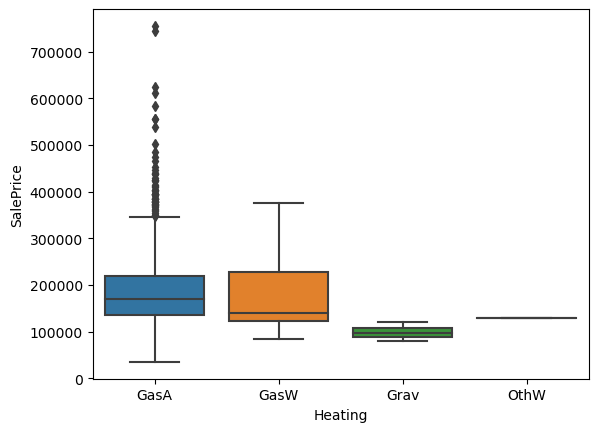

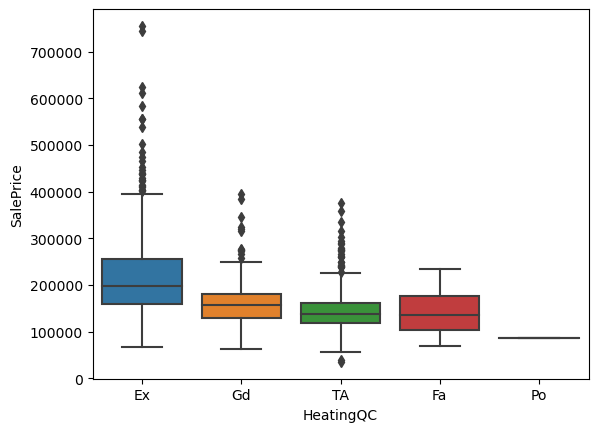

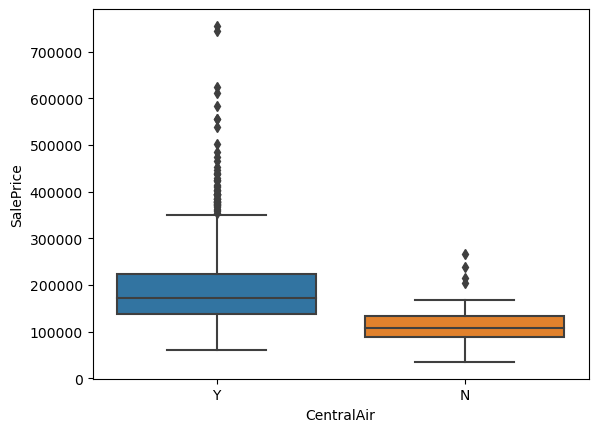

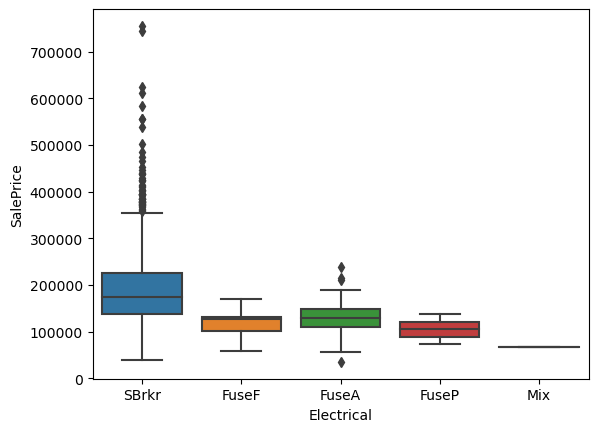

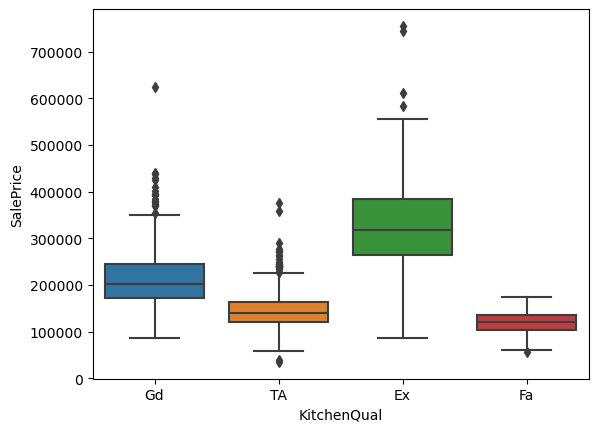

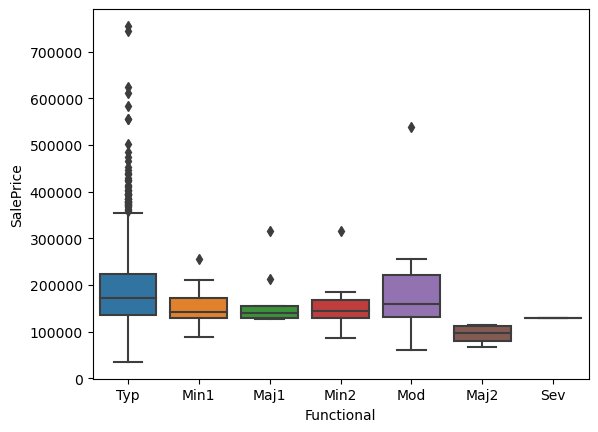

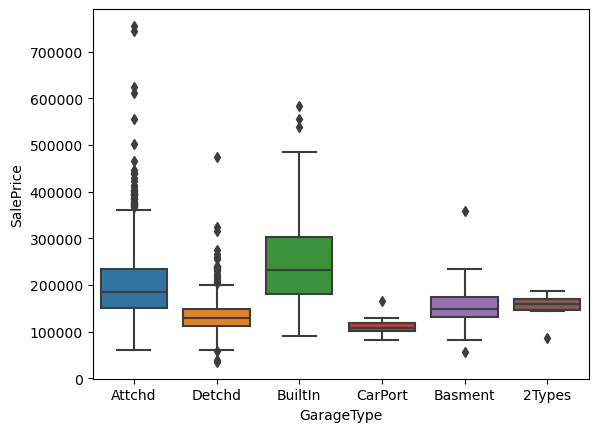

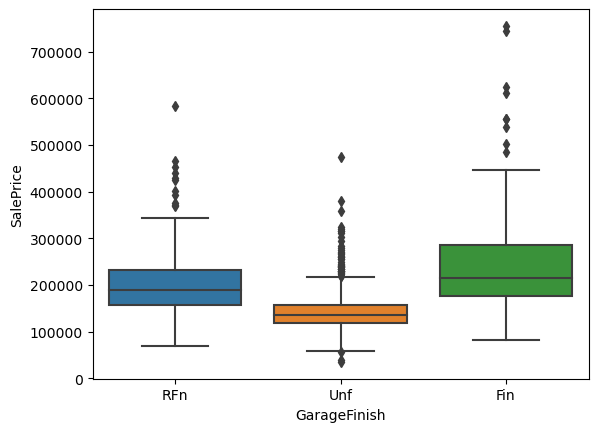

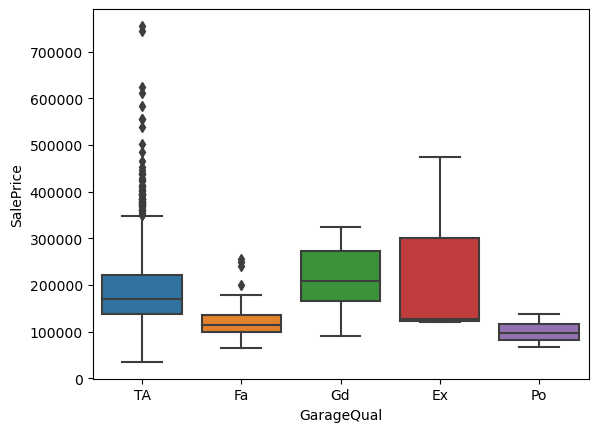

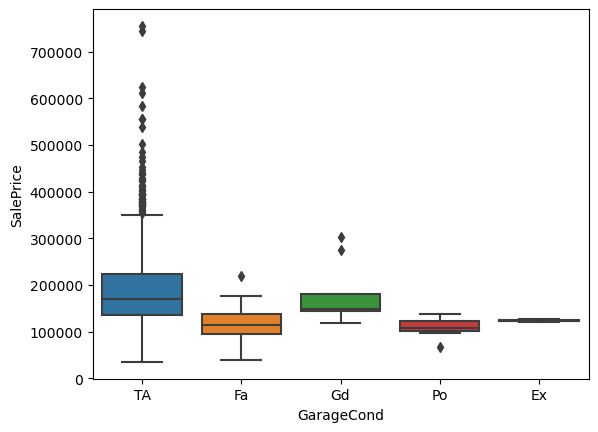

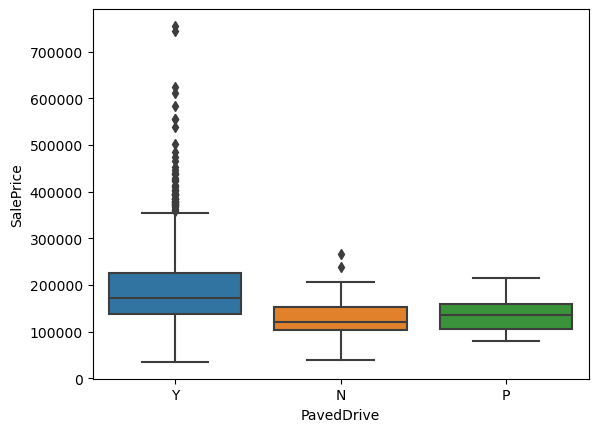

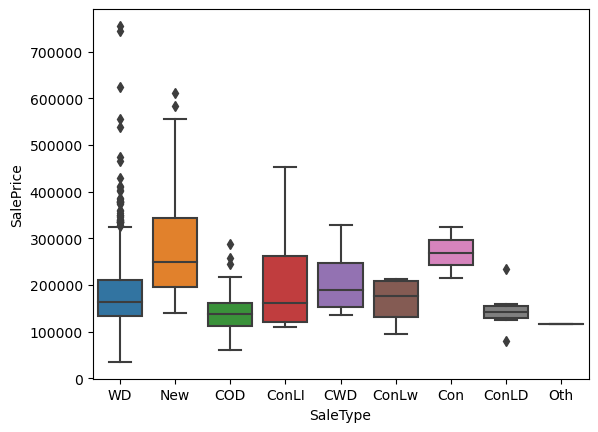

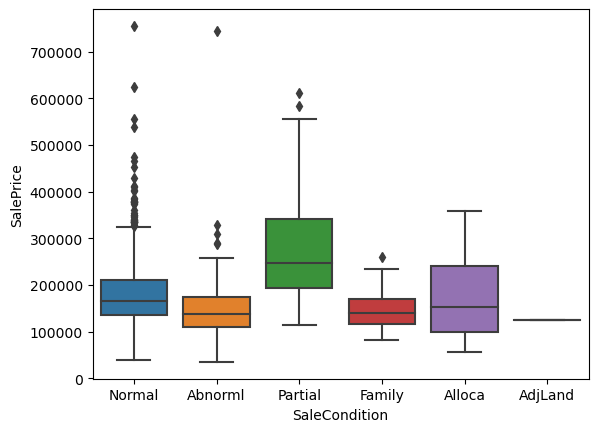

In [18]:
for col in cat_col:
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.show()

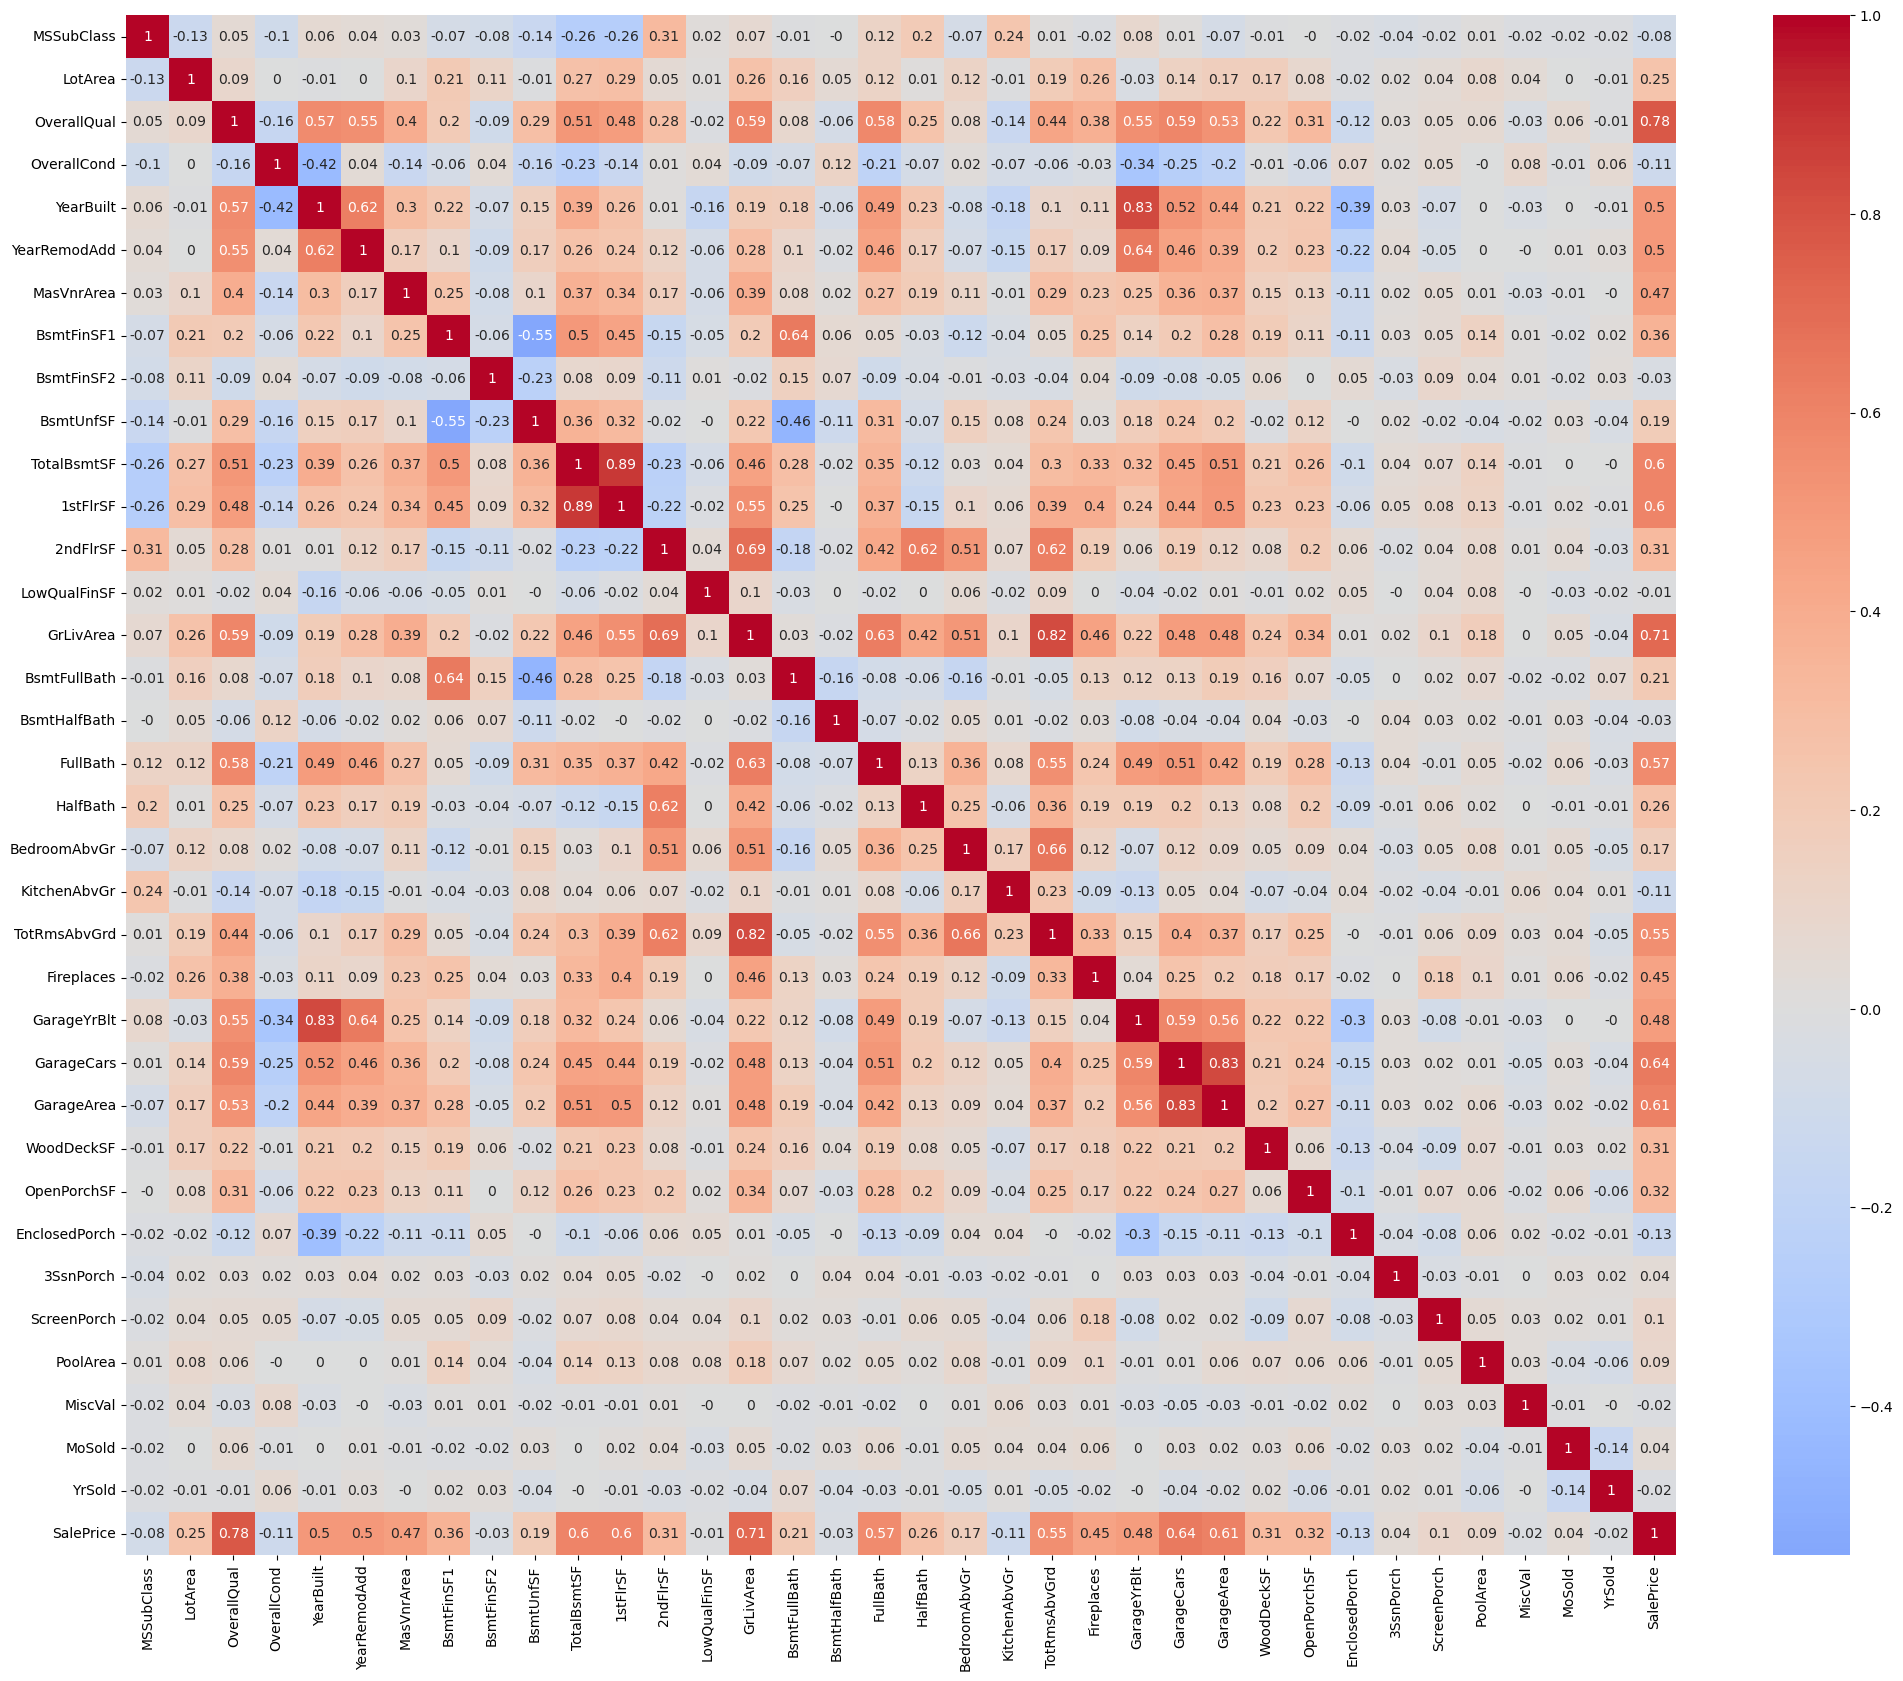

In [19]:
# Checking the corelation heatmap
plt.subplots(figsize = (25,20))

df_num.dropna()
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [20]:
df['DiffYearBuilt'] = datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd'] = datetime.now().year - df['YearRemodAdd']
df['DiffGarageYrBlt'] = datetime.now().year - df['GarageYrBlt']

In [21]:
df

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
5             50       RL    14115   Pave      IR1         Lvl    AllPub   
6             20       RL    10084   Pave      Reg         Lvl    AllPub   
7             60       RL    10382   Pave      IR1         Lvl    AllPub   
8             50       RM     6120   Pave      Reg         Lvl    AllPub   
9            190       RL     7420   Pave      Reg         Lvl    AllPub   
10            20       RL    11200   Pave      Reg         Lvl    AllPub   
11            60       RL    11924   Pave      IR1         Lvl    AllPub   
12            20       RL    12968   Pave      IR2         Lvl    AllPub   
13            20       RL    10652   Pave      IR1         Lvl    AllPub   
14            20       RL    10920   Pave      IR1         Lvl    AllPub   
15            45       RM     6120   Pave      Reg         Lvl    AllPub   
16            20       RL    11241   Pave      IR1         Lvl    AllPub   
18            20       RL    13695   Pave      Reg         Lvl    AllPub   
19            20       RL     7560   Pave      Reg         Lvl    AllPub   
20            60       RL    14215   Pave      IR1         Lvl    AllPub   
21            45       RM     7449   Pave      Reg         Bnk    AllPub   
22            20       RL     9742   Pave      Reg         Lvl    AllPub   
23           120       RM     4224   Pave      Reg         Lvl    AllPub   
24            20       RL     8246   Pave      IR1         Lvl    AllPub   
25            20       RL    14230   Pave      Reg         Lvl    AllPub   
26            20       RL     7200   Pave      Reg         Lvl    AllPub   
27            20       RL    11478   Pave      Reg         Lvl    AllPub   
28            20       RL    16321   Pave      IR1         Lvl    AllPub   
29            30       RM     6324   Pave      IR1         Lvl    AllPub   
30            70  C (all)     8500   Pave      Reg         Lvl    AllPub   
31            20       RL     8544   Pave      IR1         Lvl    AllPub   
32            20       RL    11049   Pave      Reg         Lvl    AllPub   
33            20       RL    10552   Pave      IR1         Lvl    AllPub   
34           120       RL     7313   Pave      Reg         Lvl    AllPub   
35            60       RL    13418   Pave      Reg         Lvl    AllPub   
36            20       RL    10859   Pave      Reg         Lvl    AllPub   
37            20       RL     8532   Pave      Reg         Lvl    AllPub   
38            20       RL     7922   Pave      Reg         Lvl    AllPub   
40            20       RL     8658   Pave      Reg         Lvl    AllPub   
41            20       RL    16905   Pave      Reg         Lvl    AllPub   
42            85       RL     9180   Pave      IR1         Lvl    AllPub   
43            20       RL     9200   Pave      IR1         Lvl    AllPub   
44            20       RL     7945   Pave      Reg         Lvl    AllPub   
45           120       RL     7658   Pave      Reg         Lvl    AllPub   
46            50       RL    12822   Pave      IR1         Lvl    AllPub   
47            20       FV    11096   Pave      Reg         Lvl    AllPub   
49            20       RL     7742   Pave      Reg         Lvl    AllPub   
50            60       RL    13869   Pave      IR2         Lvl    AllPub   
51            50       RM     6240   Pave      Reg         Lvl    AllPub   
52            90       RM     8472   Grvl      IR2         Bnk    AllPub   
53            20       RL    50271   Pave      IR1         Low    AllPub   
54            80       RL     7134   Pave      Reg    

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1338 non-null   int64  
 1   MSZoning          1338 non-null   object 
 2   LotArea           1338 non-null   int64  
 3   Street            1338 non-null   object 
 4   LotShape          1338 non-null   object 
 5   LandContour       1338 non-null   object 
 6   Utilities         1338 non-null   object 
 7   LotConfig         1338 non-null   object 
 8   LandSlope         1338 non-null   object 
 9   Neighborhood      1338 non-null   object 
 10  Condition1        1338 non-null   object 
 11  Condition2        1338 non-null   object 
 12  BldgType          1338 non-null   object 
 13  HouseStyle        1338 non-null   object 
 14  OverallQual       1338 non-null   int64  
 15  OverallCond       1338 non-null   int64  
 16  YearBuilt         1338 non-null   int64  


# Feature Engineering

In [24]:
#Removing Columns with High no of duplicate values as they have no role 
for column in df.columns:
    value_counts = df[column].value_counts()
    total_count = value_counts.sum()
    percentages = round(value_counts / total_count * 100, 2)
    print(f"{column}:")
    print(pd.concat([value_counts, percentages], axis=1, keys=['Counts', 'Percentages']))

MSSubClass:
     Counts  Percentages
20      502        37.52
60      294        21.97
50      129         9.64
120      86         6.43
160      61         4.56
70       57         4.26
80       57         4.26
30       51         3.81
90       28         2.09
190      21         1.57
85       19         1.42
75       14         1.05
45        9         0.67
180       6         0.45
40        4         0.30
MSZoning:
         Counts  Percentages
RL         1066        79.67
RM          191        14.28
FV           62         4.63
RH           11         0.82
C (all)       8         0.60
LotArea:
        Counts  Percentages
9600        23         1.72
7200        20         1.49
6000        16         1.20
8400        13         0.97
9000        12         0.90
10800       11         0.82
1680         9         0.67
9100         8         0.60
7500         8         0.60
3182         7         0.52
6120         7         0.52
6240         7         0.52
7800         6         0.45
812

      Counts  Percentages
864       21         1.57
912       13         0.97
848       12         0.90
894       12         0.90
672        9         0.67
1040       9         0.67
816        8         0.60
483        7         0.52
832        7         0.52
960        7         0.52
728        6         0.45
1056       6         0.45
764        6         0.45
1728       6         0.45
630        5         0.37
1314       5         0.37
1072       5         0.37
1144       5         0.37
1422       5         0.37
958        5         0.37
804        5         0.37
936        5         0.37
990        5         0.37
1026       5         0.37
768        5         0.37
1392       5         0.37
1236       5         0.37
1494       5         0.37
988        5         0.37
616        5         0.37
840        5         0.37
1442       4         0.30
1086       4         0.30
902        4         0.30
810        4         0.30
855        4         0.30
970        4         0.30
952        4

In [25]:
df.drop(['Street', 'Utilities', 'PoolArea'], axis=1,inplace=True)

In [26]:
# Removing Outliers using IQR Method

In [27]:
outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
for i in outl_col:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]



In [28]:
df.shape

(1187, 74)

In [29]:
#Creating Dummy Variable for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)        

In [30]:
df.head()
df.shape

(1187, 284)

In [31]:
print(num_col)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt']


In [ ]:
num_col.remove('OverallCond')

# Scaling of Features

In [37]:
Scaler = MinMaxScaler() # Instantiate an objectr
df_train,df_test = train_test_split(df, train_size = 0.7, random_state = 100)

df_train[num_col] = Scaler.fit_transform(df_train[num_col])

In [38]:
df_train.shape

(830, 284)

In [40]:
df_train[num_col].describe()

LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  \
count  830.000000   830.000000   830.000000  830.000000    830.000000   
mean     0.485901     0.517169     0.515146    0.719492      0.593614   
std      0.203906     0.157991     0.154224    0.229852      0.339065   
min      0.000000     0.000000     0.000000    0.000000      0.000000   
25%      0.368738     0.375000     0.428571    0.581395      0.300000   
50%      0.488475     0.500000     0.428571    0.744186      0.750000   
75%      0.615529     0.625000     0.571429    0.945736      0.900000   
max      1.000000     1.000000     1.000000    1.000000      1.000000   

       MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  \
count  830.000000  830.000000  830.000000  830.000000   830.000000   
mean     0.057488    0.282142    0.032951    0.295505     0.460154   
std      0.098123    0.256775    0.111626    0.222701     0.188673   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.129265     0.321824   
50%      0.000000    0.268347    0.000000    0.241995     0.424825   
75%      0.090625    0.447511    0.000000    0.422835     0.578089   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

         1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  \
count  830.000000  830.000000    830.000000  830.000000    830.000000   
mean     0.407831    0.216126      0.006843    0.444953      0.211446   
std      0.198516    0.263802      0.070849    0.192929      0.250792   
min      0.000000    0.000000      0.000000    0.000000      0.000000   
25%      0.256748    0.000000      0.000000    0.295111      0.000000   
50%      0.375392    0.000000      0.000000    0.433778      0.000000   
75%      0.537037    0.458721      0.000000    0.557333      0.500000   
max      1.000000    1.000000      1.000000    1.000000      1.000000   

       BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  \
count    830.000000  830.000000  830.000000    830.000000    830.000000   
mean       0.067470    0.517269    0.193976      0.475502      0.016265   
std        0.250985    0.176061    0.248687      0.124160      0.092090   
min        0.000000    0.000000    0.000000      0.000000      0.000000   
25%        0.000000    0.333333    0.000000      0.333333      0.000000   
50%        0.000000    0.666667    0.000000      0.500000      0.000000   
75%        0.000000    0.666667    0.500000      0.500000      0.000000   
max        1.000000    1.000000    1.000000      1.000000      1.000000   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count    830.000000  830.000000   830.000000  830.000000  830.000000   
mean       0.382195    0.200000     0.714600    0.271084    0.437467   
std        0.162470    0.210054     0.226018    0.203854    0.223078   
min        0.000000    0.000000     0.000000    0.000000    0.000000   
25%        0.222222    0.000000     0.554545    0.000000    0.264423   
50%        0.333333    0.333333     0.736364    0.333333    0.431319   
75%        0.444444    0.333333     0.927273    0.333333    0.571429   
max        1.000000    1.000000     1.000000    1.000000    1.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  830.000000   830.000000     830.000000  830.000000   830.000000   
mean     0.132044     0.125113       0.054685    0.006508     0.038776   
std      0.169426     0.163535       0.156626    0.061554     0.139052   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000     0.072802       0.000000    0.000000     0.000000   
75%      0.228261     0.192308       0.000000    0.000000     0.000000   
max      1.000000     1.000000       1.000000    1.000000     1.000000   

          MiscVal   SalePrice  DiffYearBuilt  DiffYearRemodAdd  \
count

# Training the Model


In [41]:

y_train = df_train.pop('SalePrice')
X_train = df_train 

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 1198 to 959
Columns: 283 entries, LotArea to SaleCondition_Partial
dtypes: float64(34), uint8(249)
memory usage: 428.8 KB


In [43]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 830 entries, 1198 to 959
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
830 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [48]:

lr = LinearRegression()

rfe = RFE(lr, n_features_to_select=100)
rfe = rfe.fit(X_train,y_train)
 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', False, 164),
 ('OverallQual', False, 162),
 ('OverallCond', False, 163),
 ('YearBuilt', False, 160),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 168),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 179),
 ('BsmtHalfBath', False, 178),
 ('FullBath', False, 182),
 ('HalfBath', False, 180),
 ('BedroomAbvGr', False, 167),
 ('KitchenAbvGr', False, 166),
 ('TotRmsAbvGrd', False, 181),
 ('Fireplaces', False, 174),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 175),
 ('GarageArea', False, 165),
 ('WoodDeckSF', False, 170),
 ('OpenPorchSF', False, 177),
 ('EnclosedPorch', False, 176),
 ('3SsnPorch', False, 169),
 ('ScreenPorch', False, 171),
 ('MiscVal', False, 172),
 ('DiffYearBuilt', False, 161),
 ('DiffYearRemodAdd', True, 1),
 ('DiffGarageYrBlt', True, 1),
 ('MSSubClass_120', True, 1),
 

In [49]:
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'DiffYearRemodAdd', 'DiffGarageYrBlt', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition2_RRAn',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Un

In [50]:
X_train_rfe = X_train[Rfe_Cols] 
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.shape

(830, 101)

In [51]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     65.09
Date:                Wed, 03 May 2023   Prob (F-statistic):          2.68e-285
Time:                        20:44:12   Log-Likelihood:                 1251.7
No. Observations:                 830   AIC:                            -2341.
Df Residuals:                     749   BIC:                            -1959.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0295    

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns 
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False) 
vif

C:\Users\issac.paul\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\issac.paul\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\issac.paul\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Features    VIF
50     HouseStyle_1.5Unf    inf
80          ExterCond_Gd    inf
78      MasVnrType_Stone    inf
77       MasVnrType_None    inf
76    MasVnrType_BrkFace    inf
75     MasVnrType_BrkCmn    inf
56       HouseStyle_SLvl    inf
55     HouseStyle_SFoyer    inf
54     HouseStyle_2Story    inf
53     HouseStyle_2.5Unf    inf
52     HouseStyle_2.5Fin    inf
51     HouseStyle_1Story    inf
1           YearRemodAdd    inf
49     HouseStyle_1.5Fin    inf
48       BldgType_TwnhsE    inf
47        BldgType_Twnhs    inf
46       BldgType_2fmCon    inf
45         BldgType_1Fam    inf
43         LandSlope_Sev    inf
79          ExterCond_Fa    inf
81          ExterCond_TA    inf
41         LandSlope_Gtl    inf
82       BsmtExposure_Av    inf
99           YrSold_2009    inf
98           YrSold_2008    inf
97           YrSold_2007    inf
96           YrSold_2006    inf
95         GarageQual_Po    inf
94        KitchenQual_TA    inf
93        KitchenQual_Gd    inf
92        KitchenQual_Fa    inf
91        KitchenQual_Ex    inf
90      Electrical_SBrkr    inf
89      Electrical_FuseF    inf
88      Electrical_FuseA    inf
87          CentralAir_Y    inf
86          CentralAir_N    inf
85       BsmtExposure_No    inf
84       BsmtExposure_Mn    inf
83       BsmtExposure_Gd    inf
42         LandSlope_Mod    inf
100          YrSold_2010    inf
40       LandContour_Lvl    inf
6               1stFlrSF    inf
39       LandContour_Low    inf
5            TotalBsmtSF    inf
26         MSSubClass_85    inf
25         MSSubClass_80    inf
24         MSSubClass_75    inf
23         MSSubClass_70    inf
22         MSSubClass_60    inf
21         MSSubClass_50    inf
20         MSSubClass_45    inf
19         MSSubClass_40    inf
18         MSSubClass_30    inf
17         MSSubClass_20    inf
16        MSSubClass_190    inf
15        MSSubClass_180    inf
14        MSSubClass_160    inf
13        MSSubClass_120    inf
12       DiffGarageYrBlt    inf
11      DiffYearRemodAdd    inf
10           GarageYrBlt    inf
9              GrLivArea    inf
8           LowQualFinSF    inf
4              BsmtUnfSF    inf
3             BsmtFinSF2    inf
27         MSSubClass_90    inf
28      MSZoning_C (all)    inf
38       LandContour_HLS    inf
37       LandContour_Bnk    inf
36          LotShape_Reg    inf
35          LotShape_IR3    inf
34          LotShape_IR2    inf
33          LotShape_IR1    inf
32           MSZoning_RM    inf
31           MSZoning_RL    inf
30           MSZoning_RH    inf
29           MSZoning_FV    inf
7               2ndFlrSF    inf
2             BsmtFinSF1    inf
66   Exterior1st_VinylSd  74.38
61   Exterior1st_HdBoard  49.26
67   Exterior1st_Wd Sdng  42.59
63   Exterior1st_MetalSd  41.35
64   Exterior1st_Plywood  23.42
60   Exterior1st_CemntBd  11.20
59   Exterior1st_BrkFace   9.26
70   Exterior2nd_HdBoard   8.41
73   Exterior2nd_Wd Sdng   7.30
68   Exterior1st_WdShing   7.24
58   Exterior1st_AsbShng   7.17
65    Exterior1st_Stucco   5.35
72   Exterior2nd_Plywood   4.50
69   Exterior2nd_AsbShng   4.11
74   Exterior2nd_Wd Shng   1.92
62   Exterior1st_ImStucc   1.70
71   Exterior2nd_ImStucc   1.50
0                  const   0.00
44       Condition2_RRAn    NaN
57      RoofMatl_Tar&Grv    NaN

# Model Prediction and Evaluation

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1109 to 785
Columns: 284 entries, LotArea to SaleCondition_Partial
dtypes: float64(3), int64(32), uint8(249)
memory usage: 187.2 KB


In [55]:
df_test[num_col] = Scaler.fit_transform(df_test[num_col])

In [56]:
y_test = df_test.pop('SalePrice') 
X_test = df_test

# Ridge - Regularization

In [58]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
16         4.0         -0.025074        -0.032734                1
15         3.0         -0.024593        -0.032801                2
17         5.0         -0.025518        -0.032807                3
18         6.0         -0.025943        -0.032948                4
14         2.0         -0.024048        -0.033089                5
19         7.0         -0.026339        -0.033121                6
20         8.0         -0.026700        -0.033316                7
21         9.0         -0.027040        -0.033496                8
22        10.0         -0.027368        -0.033667                9
13         1.0         -0.023425        -0.033959               10
12         0.9         -0.023354        -0.034130               11
11         0.8         -0.023283        -0.034323               12
10         0.7         -0.023211        -0.034548               13
9          0.6         -0.023133        -0.034810               14
8          0.5         -0.023052        -0.035112               15
23          20         -0.030115        -0.035475               16
7          0.4         -0.022965        -0.035476               17
6          0.3         -0.022869        -0.035929               18
5          0.2         -0.022763        -0.036548               19
4          0.1         -0.022645        -0.037431               20
3         0.05         -0.022569        -0.038061               21
2         0.01         -0.022492        -0.038798               22
1        0.001         -0.022470        -0.039040               23
0       0.0001         -0.022467        -0.039067               24
24          50         -0.035842        -0.040130               25
25         100         -0.041871        -0.045413               26
26         500         -0.061077        -0.062908               27

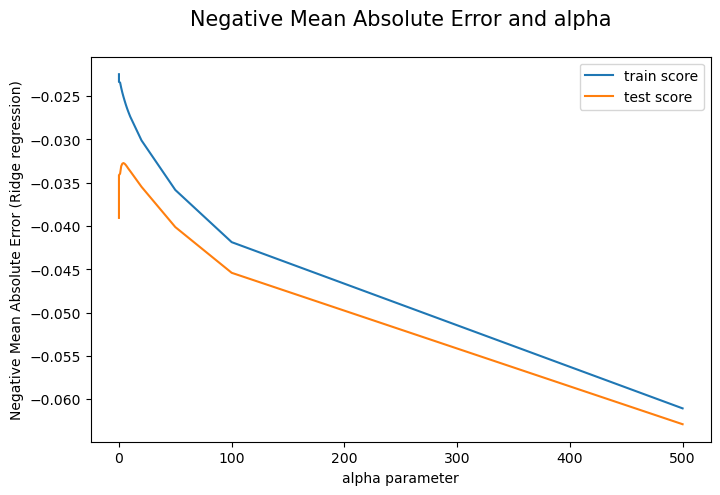

In [60]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [61]:
ridge_model_cv.best_params_


{'alpha': 4.0}

In [67]:
alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.03257651e-02,  1.07677059e-01,  5.00508195e-02,  3.17616388e-02,
        1.24206494e-02,  2.51800868e-02,  5.99387943e-02,  2.05190250e-02,
       -4.53619894e-03,  6.73238197e-02,  7.27403228e-02,  6.79208167e-02,
       -4.57995096e-03,  9.91523615e-02,  6.60581224e-03, -1.79917809e-03,
        1.99382085e-02,  5.78583425e-03, -1.40026548e-02, -2.98753786e-02,
        2.07412906e-02,  2.75108285e-02, -3.38588539e-03,  2.55431526e-02,
        4.54327426e-02,  2.53160582e-02,  1.41421630e-02,  5.98564384e-03,
        9.30355215e-03,  1.88048731e-02,  6.32789046e-03, -3.17616388e-02,
       -1.24206494e-02,  3.38588539e-03,  6.90085864e-03, -1.73422172e-02,
       -2.88474754e-03, -3.08643195e-03,  1.49912959e-02,  6.25491308e-03,
        7.78818650e-03, -1.31975633e-03, -2.46848467e-03,  8.77435131e-03,
        1.30845416e-02,  6.17626728e-03, -7.32301642e-03, -1.30425005e-02,
       -1.65032597e-02, -2.33566659e-02,  4.91692320e-03,  1.11227429e-02,
        1.05034473e-02, -

# MSE Value

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.0038440479368947247


In [65]:
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.9479821252081565


In [66]:
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8694371700553005


In [70]:
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 4: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.0039704490221973004
The r2 value of train data is  0.9479821252081565
The r2 value of test data is  0.8694371700553005

The output when alpha is 2: 
The mean squared error value is  0.0038440479368947247
The r2 value of train data is  0.9479821252081565
The r2 value of test data is  0.8694371700553005

The output when alpha is 3: 
The mean squared error value is  0.003800382305310129
The r2 value of train data is  0.9479821252081565
The r2 value of test data is  0.8694371700553005

The output when alpha is 4: 
The mean squared error value is  0.0037900269015508827
The r2 value of train data is  0.9479821252081565
The r2 value of test data is  0.8694371700553005


In [72]:
df_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
df_ridge.reset_index(drop=True, inplace=True)
df_ridge

Features  Coefficient
0                  LotArea       0.0503
1              OverallQual       0.1077
2              OverallCond       0.0501
3                YearBuilt       0.0318
4             YearRemodAdd       0.0124
5               MasVnrArea       0.0252
6               BsmtFinSF1       0.0599
7               BsmtFinSF2       0.0205
8                BsmtUnfSF      -0.0045
9              TotalBsmtSF       0.0673
10                1stFlrSF       0.0727
11                2ndFlrSF       0.0679
12            LowQualFinSF      -0.0046
13               GrLivArea       0.0992
14            BsmtFullBath       0.0066
15            BsmtHalfBath      -0.0018
16                FullBath       0.0199
17                HalfBath       0.0058
18            BedroomAbvGr      -0.0140
19            KitchenAbvGr      -0.0299
20            TotRmsAbvGrd       0.0207
21              Fireplaces       0.0275
22             GarageYrBlt      -0.0034
23              GarageCars       0.0255
24              GarageArea       0.0454
25              WoodDeckSF       0.0253
26             OpenPorchSF       0.0141
27           EnclosedPorch       0.0060
28               3SsnPorch       0.0093
29             ScreenPorch       0.0188
30                 MiscVal       0.0063
31           DiffYearBuilt      -0.0318
32        DiffYearRemodAdd      -0.0124
33         DiffGarageYrBlt       0.0034
34          MSSubClass_120       0.0069
35          MSSubClass_160      -0.0173
36          MSSubClass_180      -0.0029
37          MSSubClass_190      -0.0031
38           MSSubClass_20       0.0150
39           MSSubClass_30       0.0063
40           MSSubClass_40       0.0078
41           MSSubClass_45      -0.0013
42           MSSubClass_50      -0.0025
43           MSSubClass_60       0.0088
44           MSSubClass_70       0.0131
45           MSSubClass_75       0.0062
46           MSSubClass_80      -0.0073
47           MSSubClass_85      -0.0130
48           MSSubClass_90      -0.0165
49        MSZoning_C (all)      -0.0234
50             MSZoning_FV       0.0049
51             MSZoning_RH       0.0111
52             MSZoning_RL       0.0105
53             MSZoning_RM      -0.0032
54            LotShape_IR1      -0.0001
55            LotShape_IR2      -0.0030
56            LotShape_IR3       0.0014
57            LotShape_Reg       0.0018
58         LandContour_Bnk      -0.0009
59         LandContour_HLS       0.0140
60         LandContour_Low      -0.0082
61         LandContour_Lvl      -0.0050
62        LotConfig_Corner       0.0080
63       LotConfig_CulDSac       0.0135
64           LotConfig_FR2      -0.0119
65           LotConfig_FR3      -0.0145
66        LotConfig_Inside       0.0049
67           LandSlope_Gtl       0.0132
68           LandSlope_Mod       0.0141
69           LandSlope_Sev      -0.0273
70    Neighborhood_Blmngtn       0.0066
71    Neighborhood_Blueste       0.0058
72     Neighborhood_BrDale       0.0084
73    Neighborhood_BrkSide       0.0115
74    Neighborhood_ClearCr      -0.0246
75    Neighborhood_CollgCr      -0.0180
76    Neighborhood_Crawfor       0.0498
77    Neighborhood_Edwards      -0.0331
78    Neighborhood_Gilbert      -0.0237
79     Neighborhood_IDOTRR      -0.0001
80    Neighborhood_MeadowV      -0.0093
81    Neighborhood_Mitchel      -0.0236
82      Neighborhood_NAmes      -0.0231
83    Neighborhood_NPkVill       0.0178
84     Neighborhood_NWAmes      -0.0202
85    Neighborhood_NoRidge       0.0404
86    Neighborhood_NridgHt       0.0334
87    Neighborhood_OldTown      -0.0133
88      Neighborhood_SWISU      -0.0084
89     Neighborhood_Sawyer      -0.0145
90    Neighborhood_SawyerW      -0.0121
91    Neighborhood_Somerst       0.0179
92    Neighborhood_StoneBr       0.0594
93     Neighborhood_Timber      -0.0280
94    Neighborhood_Veenker       0.0010
95       Condition1_Artery      -0.0074
96        Condition1_Feedr      -0.0020
97         Condition1_Norm       0.0114
98         Condition1_PosA       0.0102
99         Conditi

In [73]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0503,
 'OverallQual': 0.1077,
 'OverallCond': 0.0501,
 'YearBuilt': 0.0318,
 'YearRemodAdd': 0.0124,
 'MasVnrArea': 0.0252,
 'BsmtFinSF1': 0.0599,
 'BsmtFinSF2': 0.0205,
 'BsmtUnfSF': -0.0045,
 'TotalBsmtSF': 0.0673,
 '1stFlrSF': 0.0727,
 '2ndFlrSF': 0.0679,
 'LowQualFinSF': -0.0046,
 'GrLivArea': 0.0992,
 'BsmtFullBath': 0.0066,
 'BsmtHalfBath': -0.0018,
 'FullBath': 0.0199,
 'HalfBath': 0.0058,
 'BedroomAbvGr': -0.014,
 'KitchenAbvGr': -0.0299,
 'TotRmsAbvGrd': 0.0207,
 'Fireplaces': 0.0275,
 'GarageYrBlt': -0.0034,
 'GarageCars': 0.0255,
 'GarageArea': 0.0454,
 'WoodDeckSF': 0.0253,
 'OpenPorchSF': 0.0141,
 'EnclosedPorch': 0.006,
 '3SsnPorch': 0.0093,
 'ScreenPorch': 0.0188,
 'MiscVal': 0.0063,
 'DiffYearBuilt': -0.0318,
 'DiffYearRemodAdd': -0.0124,
 'DiffGarageYrBlt': 0.0034,
 'MSSubClass_120': 0.0069,
 'MSSubClass_160': -0.0173,
 'MSSubClass_180': -0.0029,
 'MSSubClass_190': -0.0031,
 'MSSubClass_20': 0.015,
 'MSSubClass_30': 0.0063,
 'MSSubClass_40': 0.0078,
 'MSS

# RFE to reduce features to 30

In [81]:

X_train_ridge = X_train[df_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 30)            
rfe = rfe.fit(X_train_ridge, y_train)

In [83]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features

temp_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df['Coefficient'] = temp_df['Features'].apply(find)
temp_df = temp_df.sort_values(by=['Coefficient'], ascending=False)
temp_df = temp_df.head(15)
temp_df

Features  rfe_support  rfe_ranking  Coefficient
22     BsmtExposure_Gd         True            1       0.0288
10       BldgType_1Fam         True            1       0.0247
8        LandSlope_Mod         True            1       0.0141
7        LandSlope_Gtl         True            1       0.0132
17    MasVnrType_Stone         True            1       0.0092
15  MasVnrType_BrkFace         True            1       0.0074
18        ExterCond_Fa         True            1       0.0058
26        CentralAir_Y         True            1       0.0045
27    Electrical_FuseA         True            1       0.0042
1      DiffGarageYrBlt         True            1       0.0034
6         LotShape_Reg         True            1       0.0018
5         LotShape_IR3         True            1       0.0014
13     BldgType_TwnhsE         True            1       0.0008
16     MasVnrType_None         True            1       0.0008
3         LotShape_IR1         True            1      -0.0001

# Lasso Regularization

In [84]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0002         -0.026073        -0.031475                1
2       0.0003         -0.027113        -0.031513                2
3       0.0004         -0.027866        -0.031709                3
0       0.0001         -0.024528        -0.032002                4
4       0.0005         -0.028600        -0.032157                5
5        0.001         -0.032168        -0.035166                6
6        0.002         -0.036283        -0.038821                7
7        0.003         -0.039993        -0.042311                8
8        0.004         -0.043739        -0.046018                9
9        0.005         -0.047963        -0.050329               10
10        0.01         -0.065257        -0.067155               11

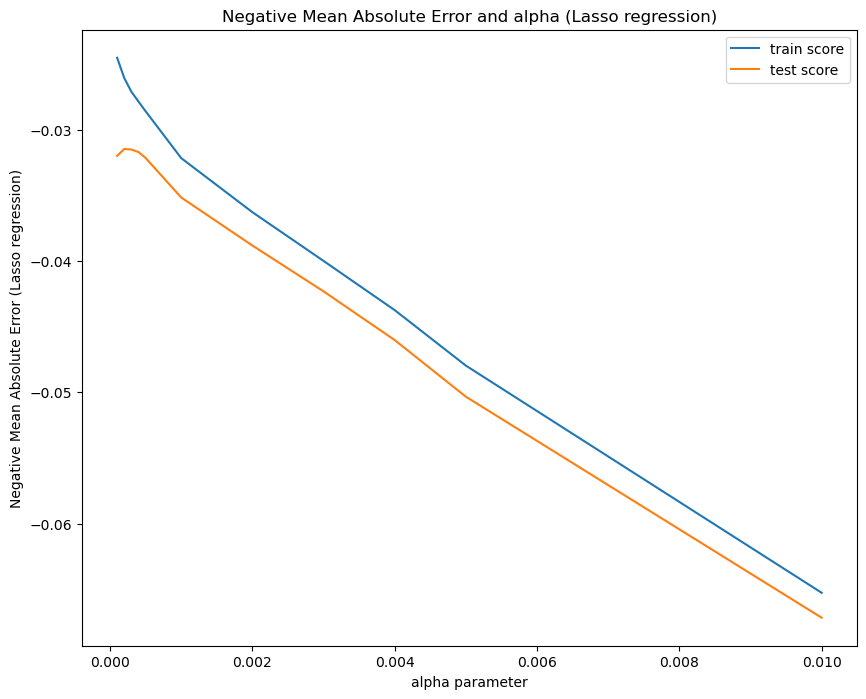

In [86]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [87]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [88]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 5.16027423e-02,  1.66344660e-01,  6.41080470e-02,  5.40550310e-02,
        1.74286996e-02,  2.36597511e-02,  6.47036557e-02,  2.04094524e-02,
       -0.00000000e+00,  7.12763780e-02,  0.00000000e+00,  2.87614276e-02,
       -0.00000000e+00,  2.50249625e-01,  5.26300004e-03, -0.00000000e+00,
        1.89260945e-03,  0.00000000e+00, -2.89720201e-02, -6.22812505e-02,
        0.00000000e+00,  1.86122280e-02, -0.00000000e+00,  1.74224511e-02,
        4.55024071e-02,  2.64463601e-02,  4.26935997e-03,  0.00000000e+00,
        0.00000000e+00,  1.71985104e-02,  0.00000000e+00, -2.52770616e-02,
       -9.21516558e-04,  0.00000000e+00,  0.00000000e+00, -1.79867012e-02,
       -0.00000000e+00,  0.00000000e+00,  1.10758465e-02,  5.90508124e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.55722346e-03,
        0.00000000e+00,  0.00000000e+00, -9.22130710e-05, -5.42407421e-03,
       -2.75714831e-02, -2.22983654e-02,  0.00000000e+00,  0.00000000e+00,
        5.55505266e-03, -

In [89]:
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.00392363494542491


In [90]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.9452041481276376
The r2 value of train data is  0.9452041481276376


In [96]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.866734002656996


In [91]:
df_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
df_lasso = df_lasso[df_lasso['Coefficient'] != 0.00]
df_lasso.reset_index(drop=True, inplace=True)
df_lasso

Features  Coefficient
0                  LotArea       0.0516
1              OverallQual       0.1663
2              OverallCond       0.0641
3                YearBuilt       0.0541
4             YearRemodAdd       0.0174
5               MasVnrArea       0.0237
6               BsmtFinSF1       0.0647
7               BsmtFinSF2       0.0204
8              TotalBsmtSF       0.0713
9                 2ndFlrSF       0.0288
10               GrLivArea       0.2502
11            BsmtFullBath       0.0053
12                FullBath       0.0019
13            BedroomAbvGr      -0.0290
14            KitchenAbvGr      -0.0623
15              Fireplaces       0.0186
16              GarageCars       0.0174
17              GarageArea       0.0455
18              WoodDeckSF       0.0264
19             OpenPorchSF       0.0043
20             ScreenPorch       0.0172
21           DiffYearBuilt      -0.0253
22        DiffYearRemodAdd      -0.0009
23          MSSubClass_160      -0.0180
24           MSSubClass_20       0.0111
25           MSSubClass_30       0.0059
26           MSSubClass_60       0.0016
27           MSSubClass_80      -0.0001
28           MSSubClass_85      -0.0054
29           MSSubClass_90      -0.0276
30        MSZoning_C (all)      -0.0223
31             MSZoning_RL       0.0056
32            LotShape_Reg       0.0011
33         LandContour_HLS       0.0157
34         LandContour_Low      -0.0020
35        LotConfig_Corner       0.0019
36       LotConfig_CulDSac       0.0077
37           LotConfig_FR2      -0.0149
38           LotConfig_FR3      -0.0053
39           LandSlope_Mod       0.0015
40           LandSlope_Sev      -0.0652
41    Neighborhood_Blmngtn       0.0155
42    Neighborhood_BrkSide       0.0149
43    Neighborhood_ClearCr      -0.0184
44    Neighborhood_CollgCr      -0.0057
45    Neighborhood_Crawfor       0.0608
46    Neighborhood_Edwards      -0.0208
47    Neighborhood_Gilbert      -0.0080
48     Neighborhood_IDOTRR       0.0019
49    Neighborhood_Mitchel      -0.0115
50      Neighborhood_NAmes      -0.0119
51    Neighborhood_NPkVill       0.0187
52     Neighborhood_NWAmes      -0.0120
53    Neighborhood_NoRidge       0.0456
54    Neighborhood_NridgHt       0.0431
55    Neighborhood_OldTown      -0.0061
56    Neighborhood_Somerst       0.0279
57    Neighborhood_StoneBr       0.0803
58     Neighborhood_Timber      -0.0185
59       Condition1_Artery      -0.0032
60         Condition1_Norm       0.0115
61         Condition1_PosN       0.0123
62         Condition1_RRAe      -0.0221
63           BldgType_1Fam       0.0192
64         BldgType_Duplex      -0.0006
65          BldgType_Twnhs      -0.0087
66       HouseStyle_2Story       0.0020
67       HouseStyle_SFoyer      -0.0061
68         RoofStyle_Gable      -0.0039
69           RoofStyle_Hip      -0.0041
70     Exterior1st_BrkFace       0.0371
71     Exterior1st_HdBoard      -0.0057
72     Exterior1st_MetalSd       0.0069
73     Exterior1st_Plywood      -0.0046
74     Exterior1st_Wd Sdng      -0.0007
75     Exterior2nd_CmentBd       0.0046
76     Exterior2nd_HdBoard      -0.0024
77      Exterior2nd_Stucco       0.0091
78     Exterior2nd_Wd Shng      -0.0097
79       MasVnrType_BrkCmn      -0.0188
80      MasVnrType_BrkFace       0.0017
81         MasVnrType_None      -0.0014
82        MasVnrType_Stone       0.0032
83            ExterQual_Ex       0.0244
84            ExterQual_TA      -0.0083
85            ExterCond_Gd      -0.0028
86       Foundation_BrkTil      -0.0093
87       Foundation_CBlock       0.0043
88         Foundation_Wood      -0.0326
89             BsmtQual_Ex       0.0412
90             BsmtQual_Fa       0.0025
91             BsmtQual_Gd      -0.0043
92             BsmtQual_TA      -0.0016
93             BsmtCond_Fa      -0.0082
94             BsmtCond_TA       0.0061
95         BsmtExposure_Av       0.0050
96         BsmtExposure_Gd       0.0359
97         BsmtExposure_Mn      -0.0043
98         BsmtExposure_No      -0.0018
99        BsmtFinT

In [92]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.051602742344805226,
 'OverallQual': 0.1663446603564966,
 'OverallCond': 0.06410804699480091,
 'YearBuilt': 0.05405503102011188,
 'YearRemodAdd': 0.017428699589933663,
 'MasVnrArea': 0.02365975105545961,
 'BsmtFinSF1': 0.0647036557302698,
 'BsmtFinSF2': 0.02040945242947814,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.07127637799691888,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0287614276308729,
 'LowQualFinSF': -0.0,
 'GrLivArea': 0.25024962509048254,
 'BsmtFullBath': 0.005263000042016212,
 'BsmtHalfBath': -0.0,
 'FullBath': 0.001892609449736536,
 'HalfBath': 0.0,
 'BedroomAbvGr': -0.02897202011399134,
 'KitchenAbvGr': -0.062281250497447864,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.01861222799074964,
 'GarageYrBlt': -0.0,
 'GarageCars': 0.01742245109745946,
 'GarageArea': 0.04550240706509193,
 'WoodDeckSF': 0.026446360110278223,
 'OpenPorchSF': 0.004269359965038469,
 'EnclosedPorch': 0.0,
 '3SsnPorch': 0.0,
 'ScreenPorch': 0.01719851037292159,
 'MiscVal': 0.0,
 'DiffYearBuilt': -0.02527706

In [94]:

X_train_lasso = X_train[df_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)



rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [95]:
def find(x):
    return lasso_coeff_dict[x]



temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
3            GrLivArea         True            1     0.250250
0          OverallQual         True            1     0.166345
1            YearBuilt         True            1     0.054055
12         BsmtQual_Ex         True            1     0.041191
17     BsmtExposure_Gd         True            1     0.035891
2         YearRemodAdd         True            1     0.017429
16     BsmtExposure_Av         True            1     0.004988
11    MasVnrType_Stone         True            1     0.003232
13         BsmtQual_Fa         True            1     0.002502
9   MasVnrType_BrkFace         True            1     0.001728

# Conclusion

The optimal value of LAMBDA we got in case of Ridge and Lasso is :

 - __Ridge - 4.0 (lowest MSE value)__

 - __Lasso - 0.0002__

The r2 value for Ridge and Lasso is:

__Ridge - Train = 0.947 , Test = 0.869__

__Lasso - Train = 0.945 , Test = 0.866__

The Mean Squared error for Ridge and Lasso is:

__Ridge - 0.00379__

__Lasso - 0.00392__

Proceeding with lasso as coefficients are closer to 0

LASSO Regularization the TOP 5 Predicted variables

 - __GrLivArea__
 - __OverallQual__	
 - __YearBuilt__
 - __BsmtQual_Ex__
 - __BsmtExposure_Gd__

In [98]:
print("The output when alpha is 8: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 8: 
The mean squared error value is  0.0037900269015508827
The r2 value of train data is  0.9452041481276376
The r2 value of test data is  0.866734002656996


In [103]:
ridge_doubled = Ridge(alpha = 8.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 8 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 8 are :

                      Coefficient
OverallQual              0.087402
GrLivArea                0.084575
1stFlrSF                 0.066656
TotalBsmtSF              0.060994
BsmtFinSF1               0.054475
2ndFlrSF                 0.053555
Neighborhood_StoneBr     0.047511
Neighborhood_Crawfor     0.046191
LotArea                  0.045719
GarageArea               0.044744


In [101]:
alpha = 0.0002 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0004: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 0.0004: 
The mean squared error value is  0.003963020587913445
The r2 value of train data is  0.9384520359553216
The r2 value of test data is  0.8653962719556855


In [104]:
 
lasso_doubled = Lasso(alpha=0.0004)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0004 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0004 are:

                      Coefficient
GrLivArea                0.239656
OverallQual              0.180856
TotalBsmtSF              0.065726
Neighborhood_Crawfor     0.064841
Neighborhood_StoneBr     0.061488
BsmtFinSF1               0.057596
GarageArea               0.050611
BsmtQual_Ex              0.049914
OverallCond              0.043671
Neighborhood_NoRidge     0.042211


In [105]:
drop_cols = ['GrLivArea','OverallQual','YearBuilt','BsmtQual_Ex','BsmtExposure_Gd']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(830, 278)
(357, 278)


In [106]:
lasso_new = Lasso(alpha=0.0001)
lasso_new.fit(X_train,y_train)
y_train_pred_new = lasso_new.predict(X_train)
y_test_pred_new = lasso_new.predict(X_test)
lasso_coef_new_df = pd.DataFrame(lasso_new.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top 5 correlated features when alpha is 0.0001 are:\n")
print(lasso_coef_new_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features when alpha is 0.0001 are:

                      Coefficient
2ndFlrSF                 0.214363
1stFlrSF                 0.187527
Neighborhood_StoneBr     0.100623
TotalBsmtSF              0.085750
OverallCond              0.081471
